<a href="https://colab.research.google.com/github/HfzhImn/2025_Artificial-Intelligence_TI-1B/blob/main/HAFIZH_smile_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
img = cv2.imread('fotosmile.jpg')

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [ ]:
faces = face_cascade.detectMultiScale(gray,1.1, 9)
print('Number of detected faces:', len(faces))

Number of detected faces: 2


In [ ]:
for (x,y,w,h) in faces:
   # Menggambar persegi pada wajah
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
   cv2.putText(img, "Face", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
   roi_gray = gray[y:y+h, x:x+w]
   roi_color = img[y:y+h, x:x+w]

   # mendeteksi senyum pada ROI wajah
   smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
   if len(smiles) > 0:
      print("smile detected")
      for (sx, sy, sw, sh) in smiles:
         cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
         cv2.putText(roi_color, "smile", (sx, sy),
         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
   else:
      print("smile not detected")



smile detected
smile not detected


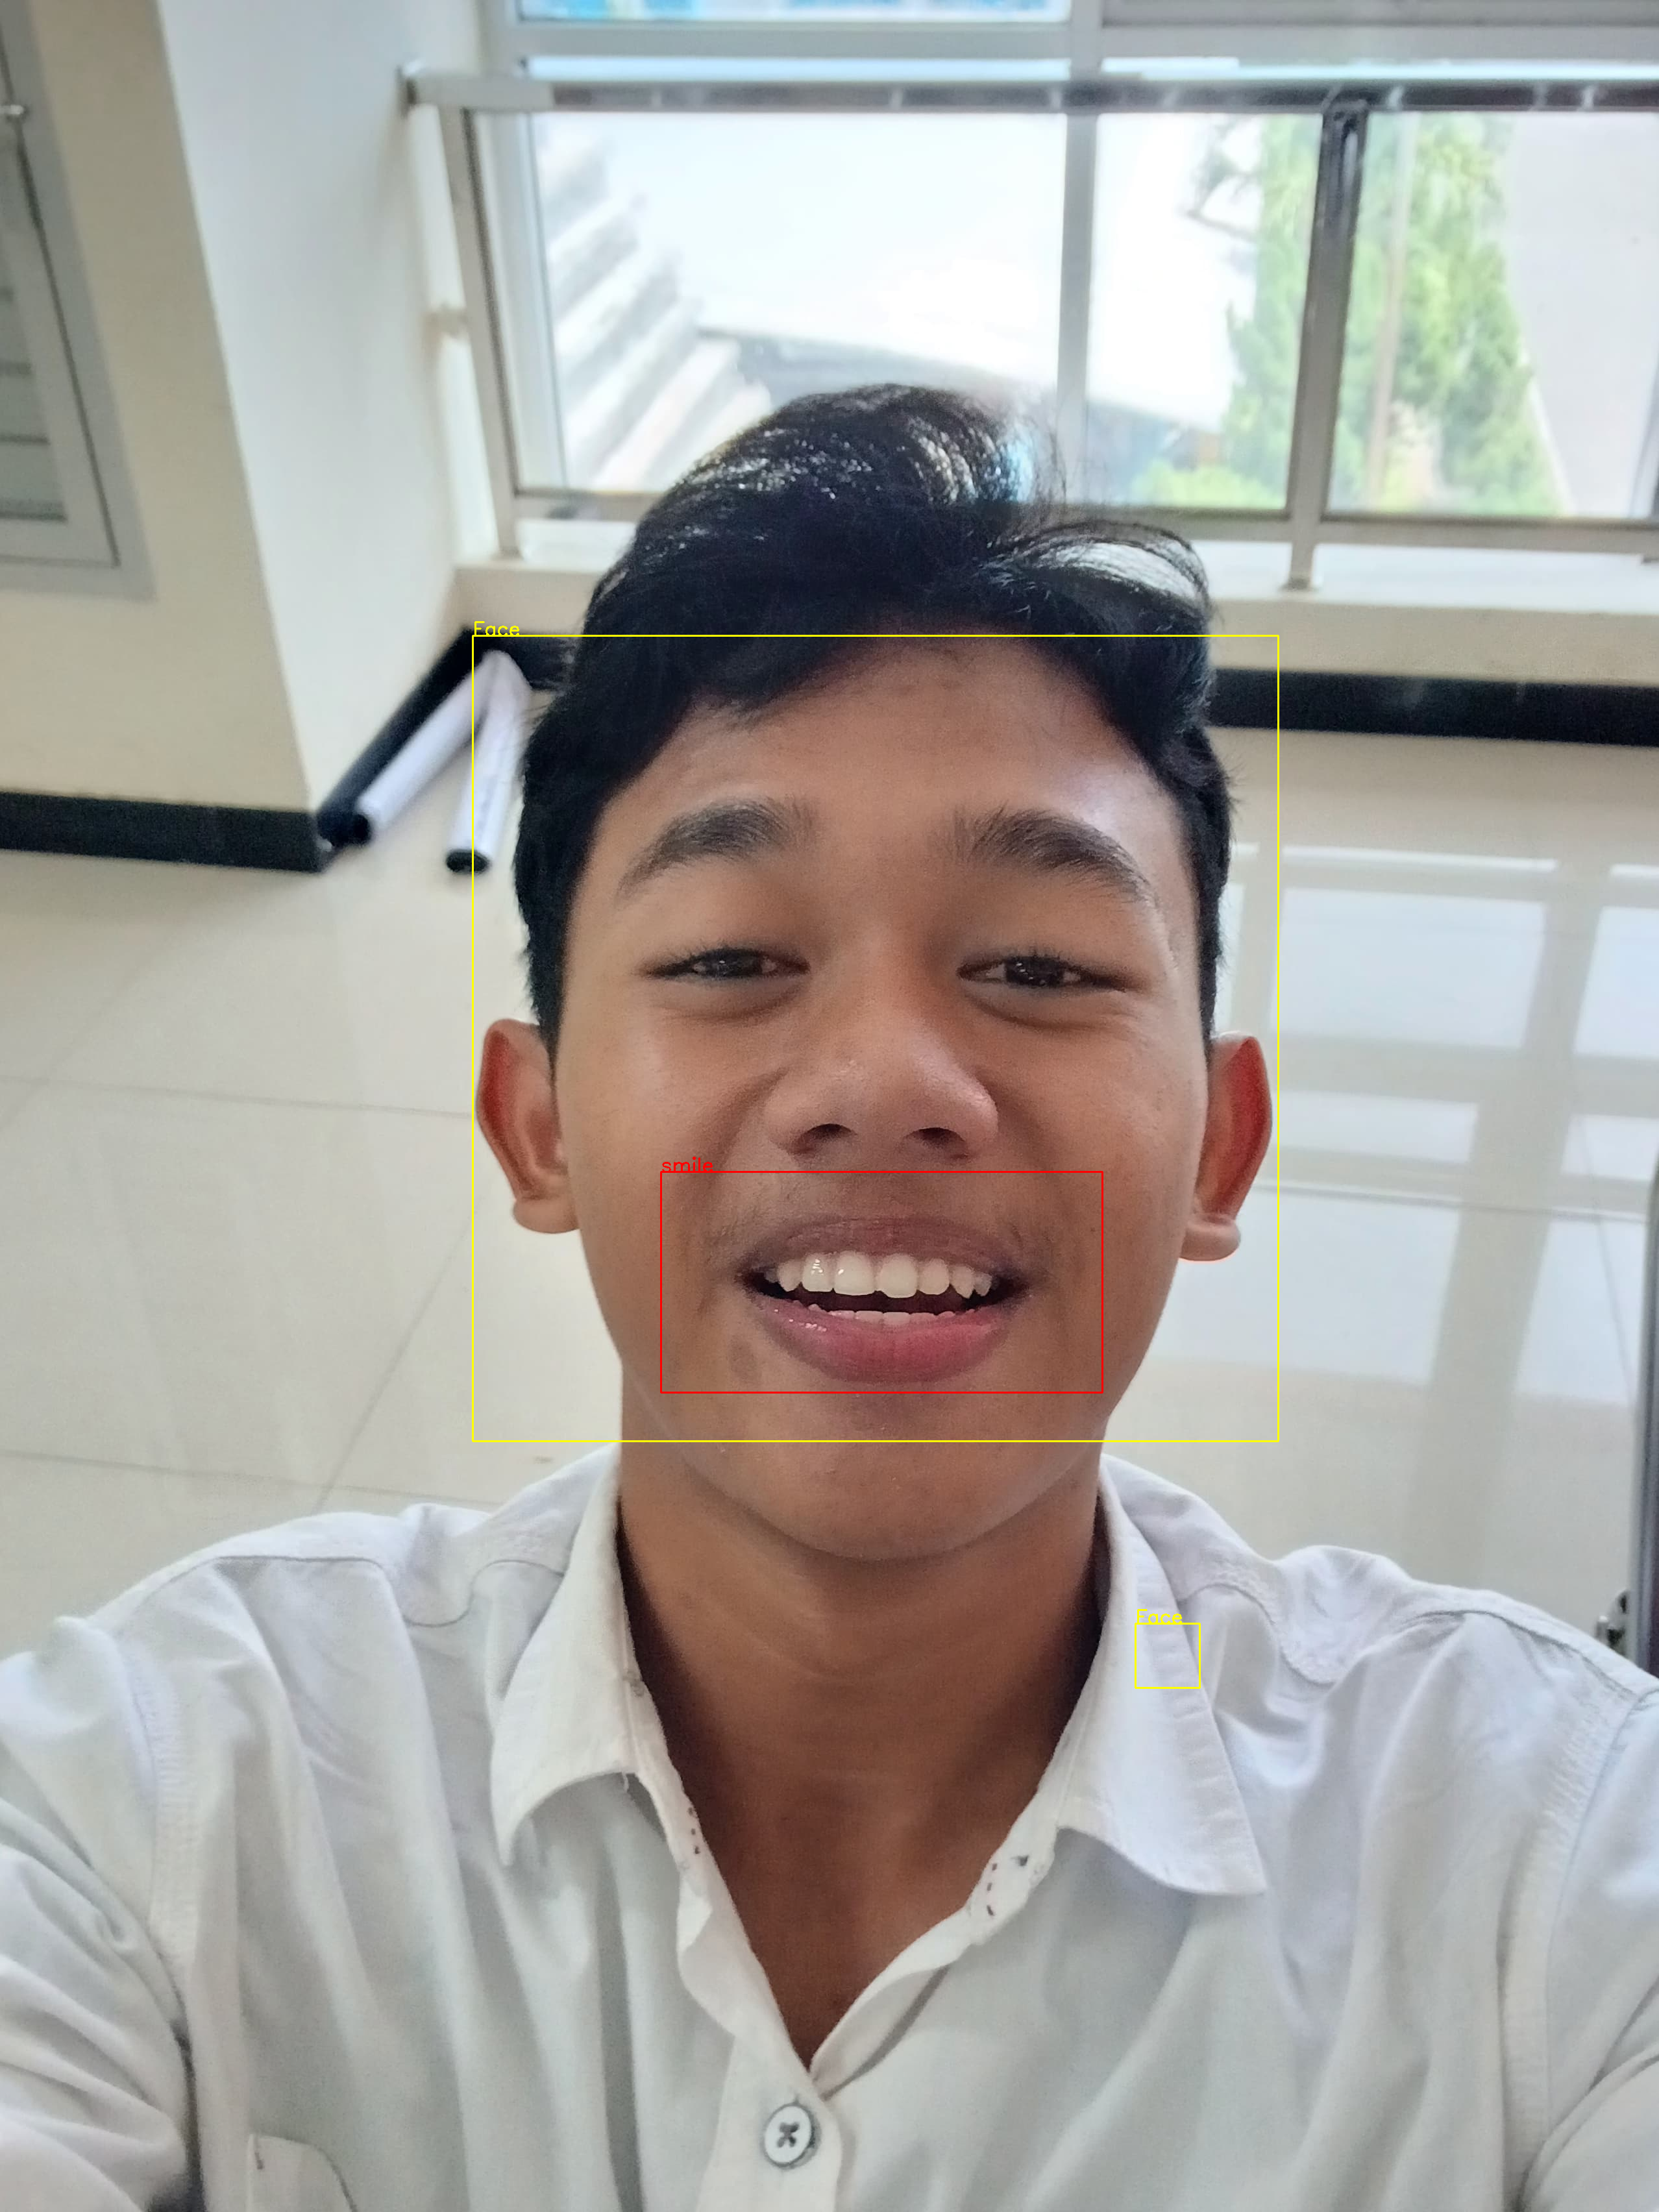

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()